# Age Detection Using Deep Neural Networks - 2 ( Using Computer Vision & Transfer Learning)



Import the required libraries

In [ ]:
import zipfile
import pathlib
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from imblearn.over_sampling import RandomOverSampler

## 1. Import Data

In [ ]:
# Let's unzip the file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/split_dataset.zip","r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
# Walk through train directory and list number of files
for dirpath, dirnames, filenames in os.walk("train"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 94 directories and 0 images in 'train'.
There are 0 directories and 146 images in 'train/005'.
There are 0 directories and 4 images in 'train/087'.
There are 0 directories and 102 images in 'train/039'.
There are 0 directories and 24 images in 'train/078'.
There are 0 directories and 101 images in 'train/056'.
There are 0 directories and 85 images in 'train/020'.
There are 0 directories and 12 images in 'train/092'.
There are 0 directories and 133 images in 'train/009'.
There are 0 directories and 58 images in 'train/062'.
There are 0 directories and 137 images in 'train/018'.
There are 0 directories and 76 images in 'train/058'.
There are 0 directories and 78 images in 'train/037'.
There are 0 directories and 218 images in 'train/003'.
There are 0 directories and 39 images in 'train/043'.
There are 0 directories and 888 images in 'train/001'.
There are 0 directories and 83 images in 'train/017'.
There are 0 directories and 6 images in 'train/083'.
There are 0 directories and

In [ ]:
# Walk through test directory and list number of files
for dirpath, dirnames, filenames in os.walk("test"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 94 directories and 0 images in 'test'.
There are 0 directories and 34 images in 'test/005'.
There are 0 directories and 0 images in 'test/087'.
There are 0 directories and 34 images in 'test/039'.
There are 0 directories and 6 images in 'test/078'.
There are 0 directories and 31 images in 'test/056'.
There are 0 directories and 18 images in 'test/020'.
There are 0 directories and 1 images in 'test/092'.
There are 0 directories and 26 images in 'test/009'.
There are 0 directories and 18 images in 'test/062'.
There are 0 directories and 44 images in 'test/018'.
There are 0 directories and 20 images in 'test/058'.
There are 0 directories and 16 images in 'test/037'.
There are 0 directories and 66 images in 'test/003'.
There are 0 directories and 13 images in 'test/043'.
There are 0 directories and 224 images in 'test/001'.
There are 0 directories and 20 images in 'test/017'.
There are 0 directories and 1 images in 'test/083'.
There are 0 directories and 13 images in 'test/065'.


In [ ]:
# Setup train and test dirs
train_dir = "train"
test_dir = "test"

In [ ]:
# Checking the classes
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['001' '002' '003' '004' '005' '006' '007' '008' '009' '010' '011' '012'
 '013' '014' '015' '016' '017' '018' '019' '020' '021' '022' '023' '024'
 '025' '026' '027' '028' '029' '030' '031' '032' '033' '034' '035' '036'
 '037' '038' '039' '040' '041' '042' '043' '044' '045' '046' '047' '048'
 '049' '050' '051' '052' '053' '054' '055' '056' '057' '058' '059' '060'
 '061' '062' '063' '064' '065' '066' '067' '068' '069' '070' '071' '072'
 '073' '074' '075' '076' '077' '078' '079' '080' '081' '082' '083' '084'
 '085' '086' '087' '088' '089' '090' '091' '092' '093' '095']


In [ ]:
len(class_names)

94

In [ ]:
# Let's view some random images of our image dataset
def view_random_image(target_dir, target_class):
  # Setup target directory
  target_folder = target_dir + '/' + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (200, 200, 3)


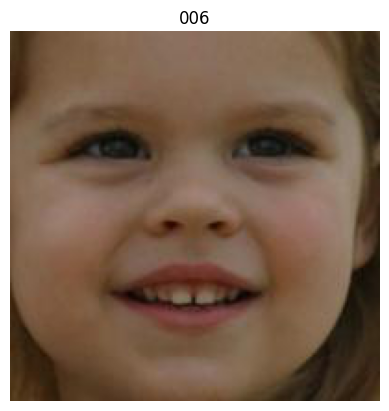

In [ ]:
img = view_random_image(target_dir="train",
                  target_class=random.choice(class_names))


## 2. Preprocess the data

In [ ]:
# Setting up data generators
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Creating train and test data for our model
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(200, 200),
                                               batch_size=16,
                                               class_mode='categorical')

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(200, 200),
                                              batch_size=16,
                                              class_mode='categorical')

Found 7813 images belonging to 94 classes.
Found 1942 images belonging to 94 classes.


## Create Model

In [ ]:
# Let's create a baseline model
# Create a model
model_1 = Sequential([
    Conv2D(64,5,activation="relu",input_shape=(200,200,3)),
    Conv2D(64,5,activation="relu"),
    MaxPool2D(),
    Conv2D(64,5,activation="relu"),
    Conv2D(64,5,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(94,activation = "softmax")
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))


Epoch 1/5
489/489 [==============================] - 75s 111ms/step - loss: 4.1618 - accuracy: 0.1124 - val_loss: 4.0393 - val_accuracy: 0.1246
Epoch 2/5
489/489 [==============================] - 49s 100ms/step - loss: 3.9010 - accuracy: 0.1327 - val_loss: 3.7752 - val_accuracy: 0.1359
Epoch 3/5
489/489 [==============================] - 51s 105ms/step - loss: 3.4229 - accuracy: 0.1801 - val_loss: 3.6855 - val_accuracy: 0.1514
Epoch 4/5
489/489 [==============================] - 46s 94ms/step - loss: 2.7547 - accuracy: 0.2949 - val_loss: 3.8918 - val_accuracy: 0.1416
Epoch 5/5
489/489 [==============================] - 51s 104ms/step - loss: 1.9018 - accuracy: 0.4906 - val_loss: 4.7928 - val_accuracy: 0.1607


The model is overfitting the data too much....Let's reduce the overfitting by decreasing the number of filters and augmenting the data

## Data Augmentation

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                              target_size=(200, 200),
                                              batch_size=16,
                                              class_mode='categorical')

Found 7813 images belonging to 94 classes.


In [ ]:
# Create a model
model_2 = Sequential([
    Conv2D(32,3,activation="relu",input_shape=(200,200,3)),
    Conv2D(32,3,activation="relu"),
    MaxPool2D(),
    Conv2D(32,3,activation="relu"),
    Conv2D(32,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(94,activation = "softmax")
])

# Compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))


Epoch 1/5
489/489 [==============================] - 127s 253ms/step - loss: 4.1416 - accuracy: 0.1154 - val_loss: 3.9941 - val_accuracy: 0.1251
Epoch 2/5
489/489 [==============================] - 106s 218ms/step - loss: 4.0383 - accuracy: 0.1206 - val_loss: 4.0466 - val_accuracy: 0.1210
Epoch 3/5
489/489 [==============================] - 111s 227ms/step - loss: 4.0230 - accuracy: 0.1216 - val_loss: 3.9252 - val_accuracy: 0.1236
Epoch 4/5
489/489 [==============================] - 114s 234ms/step - loss: 3.9992 - accuracy: 0.1258 - val_loss: 3.9506 - val_accuracy: 0.1292
Epoch 5/5
489/489 [==============================] - 115s 234ms/step - loss: 3.9708 - accuracy: 0.1257 - val_loss: 3.8903 - val_accuracy: 0.1298


In [ ]:
def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


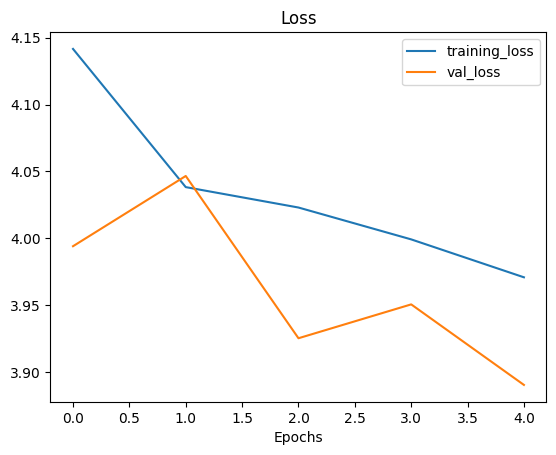

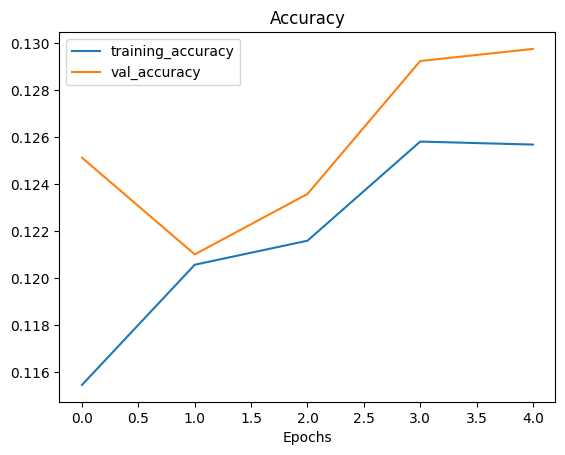

In [ ]:
# Check out the loss curves
plot_loss_curves(history_2)

Even after augmenting the data, the model is performing poorly. Let's review the data

In [ ]:
# Walk through train directory and list number of files
for dirpath, dirnames, filenames in os.walk("train"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 94 directories and 0 images in 'train'.
There are 0 directories and 146 images in 'train/005'.
There are 0 directories and 4 images in 'train/087'.
There are 0 directories and 102 images in 'train/039'.
There are 0 directories and 24 images in 'train/078'.
There are 0 directories and 101 images in 'train/056'.
There are 0 directories and 85 images in 'train/020'.
There are 0 directories and 12 images in 'train/092'.
There are 0 directories and 133 images in 'train/009'.
There are 0 directories and 58 images in 'train/062'.
There are 0 directories and 137 images in 'train/018'.
There are 0 directories and 76 images in 'train/058'.
There are 0 directories and 78 images in 'train/037'.
There are 0 directories and 218 images in 'train/003'.
There are 0 directories and 39 images in 'train/043'.
There are 0 directories and 888 images in 'train/001'.
There are 0 directories and 83 images in 'train/017'.
There are 0 directories and 6 images in 'train/083'.
There are 0 directories and

As we can see we have a lot of class imbalance. Some classes have more than 500 images while some have less than 10. Let's try to eliminate this class difference by oversampling and undersampling

## Undersampling and Oversampling data to remove class imbalance

In [ ]:
!pip install opencv-python-headless
!pip install Augmentor

In [ ]:
import Augmentor

# Creating data dirs
input_directory = "/content/train"
output_root_directory = "/content/augmented_dataset"
target_num_images_per_class = 150  # Desired number of images per class

# Creating the output root directory
os.makedirs(output_root_directory, exist_ok=True)

class_directories = os.listdir(input_directory)

# Iterating through each class directory
for class_dir in class_directories:
    class_path = os.path.join(input_directory, class_dir)

    image_files = [os.path.join(class_path, filename) for filename in os.listdir(class_path) if filename.endswith(".jpg")]

    # Calculate the number of images in this class
    num_images_in_class = len(image_files)

    # Determine how many images to sample or augment to reach the target count
    if num_images_in_class < target_num_images_per_class:
        # Create an Augmentor pipeline for this class
        p = Augmentor.Pipeline(class_path, output_directory=os.path.join(output_root_directory, class_dir))

        # Define your augmentation operations here
        p.rotate(probability=0.7, max_left_rotation=25, max_right_rotation=25)
        p.flip_left_right(probability=0.5)
        p.zoom_random(probability=0.5, percentage_area=0.8)
        p.random_contrast(probability=0.5, min_factor=0.7, max_factor=1.3)

        # Calculate how many augmented images are needed
        num_augmented_images = target_num_images_per_class - num_images_in_class

        # Sample from the pipeline to generate augmented images
        p.sample(num_augmented_images)

Initialised with 146 image(s) found.
Output directory set to /content/augmented_dataset/005.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A88354370>: 100%|██████████| 150/150 [00:03<00:00, 49.86 Samples/s]


Initialised with 4 image(s) found.
Output directory set to /content/augmented_dataset/087.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A8866E0B0>: 100%|██████████| 150/150 [00:04<00:00, 32.19 Samples/s]


Initialised with 102 image(s) found.
Output directory set to /content/augmented_dataset/039.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A882D7250>: 100%|██████████| 150/150 [00:03<00:00, 47.24 Samples/s]


Initialised with 24 image(s) found.
Output directory set to /content/augmented_dataset/078.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A88325930>: 100%|██████████| 150/150 [00:03<00:00, 42.50 Samples/s]


Initialised with 101 image(s) found.
Output directory set to /content/augmented_dataset/056.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AA63FAC50>: 100%|██████████| 150/150 [00:04<00:00, 36.97 Samples/s]


Initialised with 85 image(s) found.
Output directory set to /content/augmented_dataset/020.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A88589720>: 100%|██████████| 150/150 [00:05<00:00, 29.34 Samples/s]


Initialised with 12 image(s) found.
Output directory set to /content/augmented_dataset/092.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AA61C9D80>: 100%|██████████| 150/150 [00:03<00:00, 42.20 Samples/s]


Initialised with 133 image(s) found.
Output directory set to /content/augmented_dataset/009.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1B4822A470>: 100%|██████████| 150/150 [00:03<00:00, 46.38 Samples/s]


Initialised with 58 image(s) found.
Output directory set to /content/augmented_dataset/062.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A884387F0>: 100%|██████████| 150/150 [00:02<00:00, 50.71 Samples/s]


Initialised with 137 image(s) found.
Output directory set to /content/augmented_dataset/018.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AAE0F1C00>: 100%|██████████| 150/150 [00:04<00:00, 31.80 Samples/s]


Initialised with 76 image(s) found.
Output directory set to /content/augmented_dataset/058.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AA63FBF40>: 100%|██████████| 150/150 [00:02<00:00, 50.12 Samples/s]


Initialised with 78 image(s) found.
Output directory set to /content/augmented_dataset/037.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A4449E890>: 100%|██████████| 150/150 [00:02<00:00, 54.43 Samples/s]


Initialised with 218 image(s) found.
Output directory set to /content/augmented_dataset/003.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A886E9A80>: 100%|██████████| 150/150 [00:02<00:00, 54.72 Samples/s]


Initialised with 39 image(s) found.
Output directory set to /content/augmented_dataset/043.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A8824DC00>: 100%|██████████| 150/150 [00:03<00:00, 42.89 Samples/s]


Initialised with 888 image(s) found.
Output directory set to /content/augmented_dataset/001.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AAE26C220>: 100%|██████████| 150/150 [00:03<00:00, 39.38 Samples/s]


Initialised with 83 image(s) found.
Output directory set to /content/augmented_dataset/017.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A19E8668DF0>: 100%|██████████| 150/150 [00:02<00:00, 54.35 Samples/s]


Initialised with 6 image(s) found.
Output directory set to /content/augmented_dataset/083.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A8843A590>: 100%|██████████| 150/150 [00:02<00:00, 52.50 Samples/s]


Initialised with 100 image(s) found.
Output directory set to /content/augmented_dataset/065.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A886E82B0>: 100%|██████████| 150/150 [00:02<00:00, 51.35 Samples/s]


Initialised with 58 image(s) found.
Output directory set to /content/augmented_dataset/047.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A88327370>: 100%|██████████| 150/150 [00:04<00:00, 33.07 Samples/s]


Initialised with 76 image(s) found.
Output directory set to /content/augmented_dataset/038.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A8843BE50>: 100%|██████████| 150/150 [00:03<00:00, 46.45 Samples/s]


Initialised with 46 image(s) found.
Output directory set to /content/augmented_dataset/059.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A19E866B370>: 100%|██████████| 150/150 [00:02<00:00, 52.37 Samples/s]


Initialised with 72 image(s) found.
Output directory set to /content/augmented_dataset/040.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1B482E5EA0>: 100%|██████████| 150/150 [00:02<00:00, 55.07 Samples/s]


Initialised with 121 image(s) found.
Output directory set to /content/augmented_dataset/032.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A8858B280>: 100%|██████████| 150/150 [00:03<00:00, 46.40 Samples/s]


Initialised with 44 image(s) found.
Output directory set to /content/augmented_dataset/019.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A88746C80>: 100%|██████████| 150/150 [00:04<00:00, 35.07 Samples/s]


Initialised with 228 image(s) found.
Output directory set to /content/augmented_dataset/026.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AA63FA500>: 100%|██████████| 150/150 [00:02<00:00, 52.45 Samples/s]


Initialised with 85 image(s) found.
Output directory set to /content/augmented_dataset/050.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A8843B100>: 100%|██████████| 150/150 [00:02<00:00, 52.79 Samples/s]


Initialised with 25 image(s) found.
Output directory set to /content/augmented_dataset/064.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AE3F05390>: 100%|██████████| 150/150 [00:02<00:00, 52.51 Samples/s]


Initialised with 109 image(s) found.
Output directory set to /content/augmented_dataset/010.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AA611B7F0>: 100%|██████████| 150/150 [00:03<00:00, 38.54 Samples/s]


Initialised with 113 image(s) found.
Output directory set to /content/augmented_dataset/022.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AAE26C700>: 100%|██████████| 150/150 [00:03<00:00, 39.69 Samples/s]


Initialised with 37 image(s) found.
Output directory set to /content/augmented_dataset/070.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A88327790>: 100%|██████████| 150/150 [00:02<00:00, 53.15 Samples/s]


Initialised with 51 image(s) found.
Output directory set to /content/augmented_dataset/046.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AAE0F3940>: 100%|██████████| 150/150 [00:02<00:00, 53.95 Samples/s]


Initialised with 17 image(s) found.
Output directory set to /content/augmented_dataset/086.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AA627D5D0>: 100%|██████████| 150/150 [00:02<00:00, 51.08 Samples/s]


Initialised with 50 image(s) found.
Output directory set to /content/augmented_dataset/051.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A20B62410>: 100%|██████████| 150/150 [00:04<00:00, 33.32 Samples/s]


Initialised with 69 image(s) found.
Output directory set to /content/augmented_dataset/042.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AAE26E8F0>: 100%|██████████| 150/150 [00:02<00:00, 50.30 Samples/s]


Initialised with 13 image(s) found.
Output directory set to /content/augmented_dataset/089.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A882D7250>: 100%|██████████| 150/150 [00:02<00:00, 50.35 Samples/s]


Initialised with 62 image(s) found.
Output directory set to /content/augmented_dataset/045.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AA63FA770>: 100%|██████████| 150/150 [00:02<00:00, 52.02 Samples/s]


Initialised with 106 image(s) found.
Output directory set to /content/augmented_dataset/060.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A88588850>: 100%|██████████| 150/150 [00:03<00:00, 42.42 Samples/s]


Initialised with 42 image(s) found.
Output directory set to /content/augmented_dataset/066.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AAE2395A0>: 100%|██████████| 150/150 [00:04<00:00, 32.76 Samples/s]


Initialised with 43 image(s) found.
Output directory set to /content/augmented_dataset/063.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AA6119090>: 100%|██████████| 150/150 [00:02<00:00, 52.57 Samples/s]


Initialised with 31 image(s) found.
Output directory set to /content/augmented_dataset/067.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AAE238460>: 100%|██████████| 150/150 [00:03<00:00, 38.56 Samples/s]


Initialised with 105 image(s) found.
Output directory set to /content/augmented_dataset/053.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A19EE1D0E80>: 100%|██████████| 150/150 [00:04<00:00, 33.91 Samples/s]


Initialised with 85 image(s) found.
Output directory set to /content/augmented_dataset/006.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A88721540>: 100%|██████████| 150/150 [00:03<00:00, 38.70 Samples/s]


Initialised with 16 image(s) found.
Output directory set to /content/augmented_dataset/088.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AAE238370>: 100%|██████████| 150/150 [00:03<00:00, 49.83 Samples/s]


Initialised with 108 image(s) found.
Output directory set to /content/augmented_dataset/052.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A883267A0>: 100%|██████████| 150/150 [00:02<00:00, 51.19 Samples/s]


Initialised with 16 image(s) found.
Output directory set to /content/augmented_dataset/074.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A8843BAC0>: 100%|██████████| 150/150 [00:02<00:00, 52.67 Samples/s]


Initialised with 75 image(s) found.
Output directory set to /content/augmented_dataset/023.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AA6211E10>: 100%|██████████| 150/150 [00:04<00:00, 33.11 Samples/s]


Initialised with 118 image(s) found.
Output directory set to /content/augmented_dataset/021.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A88779D20>: 100%|██████████| 150/150 [00:04<00:00, 31.25 Samples/s]


Initialised with 3 image(s) found.
Output directory set to /content/augmented_dataset/095.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A19E866B280>: 100%|██████████| 150/150 [00:03<00:00, 47.38 Samples/s]


Initialised with 85 image(s) found.
Output directory set to /content/augmented_dataset/012.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AAE3022F0>: 100%|██████████| 150/150 [00:02<00:00, 53.21 Samples/s]


Initialised with 115 image(s) found.
Output directory set to /content/augmented_dataset/015.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AAE356D70>: 100%|██████████| 150/150 [00:02<00:00, 52.70 Samples/s]


Initialised with 370 image(s) found.
Output directory set to /content/augmented_dataset/002.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A88327790>: 100%|██████████| 150/150 [00:03<00:00, 41.64 Samples/s]


Initialised with 194 image(s) found.
Output directory set to /content/augmented_dataset/008.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AA61C9D80>: 100%|██████████| 150/150 [00:03<00:00, 38.52 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/augmented_dataset/091.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A8858BFD0>: 100%|██████████| 150/150 [00:02<00:00, 51.36 Samples/s]


Initialised with 84 image(s) found.
Output directory set to /content/augmented_dataset/049.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=200x200 at 0x7A1A88721B40>: 100%|██████████| 150/150 [00:02<00:00, 52.38 Samples/s]


Initialised with 124 image(s) found.
Output directory set to /content/augmented_dataset/025.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A13F88070>: 100%|██████████| 150/150 [00:02<00:00, 53.80 Samples/s]


Initialised with 93 image(s) found.
Output directory set to /content/augmented_dataset/030.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AA6193A00>: 100%|██████████| 150/150 [00:04<00:00, 33.31 Samples/s]


Initialised with 3 image(s) found.
Output directory set to /content/augmented_dataset/093.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A8858A9E0>: 100%|██████████| 150/150 [00:02<00:00, 56.01 Samples/s]


Initialised with 50 image(s) found.
Output directory set to /content/augmented_dataset/090.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AA61933A0>: 100%|██████████| 150/150 [00:02<00:00, 53.88 Samples/s]


Initialised with 9 image(s) found.
Output directory set to /content/augmented_dataset/081.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A88327370>: 100%|██████████| 150/150 [00:02<00:00, 52.64 Samples/s]


Initialised with 26 image(s) found.
Output directory set to /content/augmented_dataset/073.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A8843B3D0>: 100%|██████████| 150/150 [00:03<00:00, 45.59 Samples/s]


Initialised with 111 image(s) found.
Output directory set to /content/augmented_dataset/028.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AAE397040>: 100%|██████████| 150/150 [00:04<00:00, 34.04 Samples/s]


Initialised with 60 image(s) found.
Output directory set to /content/augmented_dataset/013.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A19EE1D2DA0>: 100%|██████████| 150/150 [00:02<00:00, 54.30 Samples/s]


Initialised with 50 image(s) found.
Output directory set to /content/augmented_dataset/048.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AA627E860>: 100%|██████████| 150/150 [00:02<00:00, 51.90 Samples/s]


Initialised with 108 image(s) found.
Output directory set to /content/augmented_dataset/029.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1B483476D0>: 100%|██████████| 150/150 [00:03<00:00, 49.96 Samples/s]


Initialised with 101 image(s) found.
Output directory set to /content/augmented_dataset/007.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A8858B040>: 100%|██████████| 150/150 [00:04<00:00, 34.39 Samples/s]


Initialised with 24 image(s) found.
Output directory set to /content/augmented_dataset/082.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A8B5CC310>: 100%|██████████| 150/150 [00:03<00:00, 40.90 Samples/s]


Initialised with 14 image(s) found.
Output directory set to /content/augmented_dataset/079.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AE3FB2950>: 100%|██████████| 150/150 [00:02<00:00, 51.48 Samples/s]


Initialised with 211 image(s) found.
Output directory set to /content/augmented_dataset/004.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A19E853F5B0>: 100%|██████████| 150/150 [00:02<00:00, 53.49 Samples/s]


Initialised with 69 image(s) found.
Output directory set to /content/augmented_dataset/034.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AAE397B20>: 100%|██████████| 150/150 [00:03<00:00, 42.62 Samples/s]


Initialised with 80 image(s) found.
Output directory set to /content/augmented_dataset/054.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AAE357AC0>: 100%|██████████| 150/150 [00:04<00:00, 35.63 Samples/s]


Initialised with 71 image(s) found.
Output directory set to /content/augmented_dataset/075.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1B4822B460>: 100%|██████████| 150/150 [00:02<00:00, 52.13 Samples/s]


Initialised with 52 image(s) found.
Output directory set to /content/augmented_dataset/011.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A19EF368220>: 100%|██████████| 150/150 [00:02<00:00, 52.08 Samples/s]


Initialised with 57 image(s) found.
Output directory set to /content/augmented_dataset/072.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A19E853F100>: 100%|██████████| 150/150 [00:02<00:00, 50.04 Samples/s]


Initialised with 58 image(s) found.
Output directory set to /content/augmented_dataset/080.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A19EF3691B0>: 100%|██████████| 150/150 [00:04<00:00, 31.35 Samples/s]


Initialised with 20 image(s) found.
Output directory set to /content/augmented_dataset/044.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AAE0F3490>: 100%|██████████| 150/150 [00:03<00:00, 49.55 Samples/s]


Initialised with 46 image(s) found.
Output directory set to /content/augmented_dataset/041.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A19EF4FC850>: 100%|██████████| 150/150 [00:02<00:00, 51.93 Samples/s]


Initialised with 43 image(s) found.
Output directory set to /content/augmented_dataset/061.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A886EB3D0>: 100%|██████████| 150/150 [00:02<00:00, 51.24 Samples/s]


Initialised with 89 image(s) found.
Output directory set to /content/augmented_dataset/036.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A13F88070>: 100%|██████████| 150/150 [00:03<00:00, 40.59 Samples/s]


Initialised with 46 image(s) found.
Output directory set to /content/augmented_dataset/055.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A8824DED0>: 100%|██████████| 150/150 [00:03<00:00, 38.09 Samples/s]


Initialised with 37 image(s) found.
Output directory set to /content/augmented_dataset/069.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AE3F93A60>: 100%|██████████| 150/150 [00:02<00:00, 51.82 Samples/s]


Initialised with 96 image(s) found.
Output directory set to /content/augmented_dataset/027.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A19E840B340>: 100%|██████████| 150/150 [00:03<00:00, 48.87 Samples/s]


Initialised with 14 image(s) found.
Output directory set to /content/augmented_dataset/077.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AA6193940>: 100%|██████████| 150/150 [00:03<00:00, 45.00 Samples/s]


Initialised with 96 image(s) found.
Output directory set to /content/augmented_dataset/035.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AAE1CE650>: 100%|██████████| 150/150 [00:04<00:00, 31.81 Samples/s]


Initialised with 78 image(s) found.
Output directory set to /content/augmented_dataset/031.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AA6257CA0>: 100%|██████████| 150/150 [00:02<00:00, 50.58 Samples/s]


Initialised with 24 image(s) found.
Output directory set to /content/augmented_dataset/076.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A19E853C640>: 100%|██████████| 150/150 [00:02<00:00, 50.82 Samples/s]


Initialised with 18 image(s) found.
Output directory set to /content/augmented_dataset/071.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AB2B37940>: 100%|██████████| 150/150 [00:02<00:00, 51.96 Samples/s]


Initialised with 149 image(s) found.
Output directory set to /content/augmented_dataset/024.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A19EE232290>: 100%|██████████| 150/150 [00:04<00:00, 36.05 Samples/s]


Initialised with 163 image(s) found.
Output directory set to /content/augmented_dataset/016.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AAE239F00>: 100%|██████████| 150/150 [00:03<00:00, 43.80 Samples/s]


Initialised with 43 image(s) found.
Output directory set to /content/augmented_dataset/057.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AB2B36710>: 100%|██████████| 150/150 [00:02<00:00, 50.39 Samples/s]


Initialised with 117 image(s) found.
Output directory set to /content/augmented_dataset/085.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AAE0F37F0>: 100%|██████████| 150/150 [00:03<00:00, 49.07 Samples/s]


Initialised with 110 image(s) found.
Output directory set to /content/augmented_dataset/014.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AAE302B30>: 100%|██████████| 150/150 [00:04<00:00, 35.61 Samples/s]


Initialised with 36 image(s) found.
Output directory set to /content/augmented_dataset/033.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A19EF4FD1E0>: 100%|██████████| 150/150 [00:03<00:00, 38.07 Samples/s]


Initialised with 10 image(s) found.
Output directory set to /content/augmented_dataset/084.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1A88720AF0>: 100%|██████████| 150/150 [00:02<00:00, 50.13 Samples/s]


Initialised with 44 image(s) found.
Output directory set to /content/augmented_dataset/068.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7A1AA6193610>: 100%|██████████| 150/150 [00:03<00:00, 39.90 Samples/s]


Now all of our classes have same number of images. Let's begin preprocessing them for model testing

In [ ]:
train_data_new = train_datagen.flow_from_directory(train_dir,
                                               target_size=(200, 200),
                                               batch_size=16,
                                               class_mode='categorical')

test_data_new = train_datagen.flow_from_directory(test_dir,
                                              target_size=(200, 200),
                                              batch_size=16,
                                              class_mode='categorical')

Found 14170 images belonging to 94 classes.
Found 1942 images belonging to 94 classes.


In [ ]:
# Create a model
model_3 = Sequential([
    Conv2D(32,3,activation="relu",input_shape=(200,200,3)),
    Conv2D(32,3,activation="relu"),
    MaxPool2D(),
    Conv2D(32,3,activation="relu"),
    Conv2D(32,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(94,activation = "softmax")
])

# Compile the model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data_new,
            epochs=5,
            steps_per_epoch=len(train_data_new),
            validation_data=test_data_new,
            validation_steps=len(test_data_new))


Epoch 1/5
886/886 [==============================] - 50s 54ms/step - loss: 4.3672 - accuracy: 0.0427 - val_loss: 3.8906 - val_accuracy: 0.0932
Epoch 2/5
886/886 [==============================] - 53s 60ms/step - loss: 3.1394 - accuracy: 0.2706 - val_loss: 3.9412 - val_accuracy: 0.1251
Epoch 3/5
886/886 [==============================] - 52s 58ms/step - loss: 1.2713 - accuracy: 0.6869 - val_loss: 6.5133 - val_accuracy: 0.1117
Epoch 4/5
886/886 [==============================] - 47s 52ms/step - loss: 0.3904 - accuracy: 0.9133 - val_loss: 9.6239 - val_accuracy: 0.1164
Epoch 5/5
886/886 [==============================] - 45s 51ms/step - loss: 0.2023 - accuracy: 0.9674 - val_loss: 10.1972 - val_accuracy: 0.1097


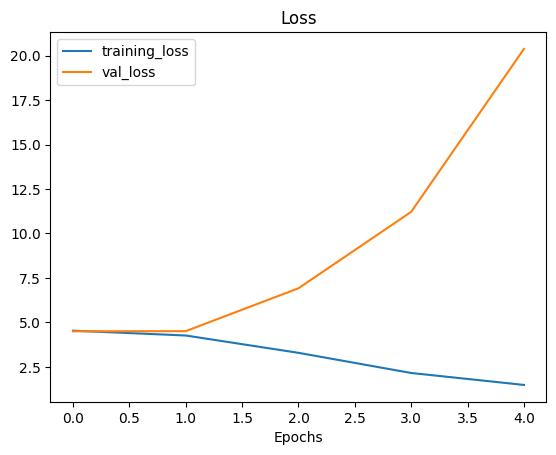

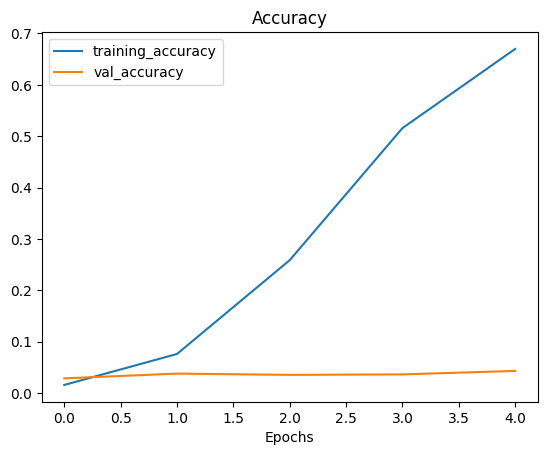

In [ ]:
# Plot the loss curves
plot_loss_curves(history_3)

Even after eliminating class imbalance the model is still not preforming well. Let's try transfer learning and see if we can make a better model

## Transfer Learning

Let's make a transfer learning model using functional API and data augmentation

In [ ]:
data_augmentation = tf.keras.models.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.RandomZoom(0.1)
], name="data_augmentation")

In [ ]:
# Setup input shape and base model, freezing the base model layers
input_shape = (200, 200, 3)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = tf.keras.layers.Dense(94, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_4 = tf.keras.Model(inputs, outputs)

# Compile the model
model_4.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_4 = model_4.fit(train_data_new,
                    epochs=5,
                    steps_per_epoch=len(train_data_new),
                    validation_data=test_data,
                    validation_steps= len(test_data))

Epoch 1/5
886/886 [==============================] - 61s 59ms/step - loss: 4.6884 - accuracy: 0.0116 - val_loss: 4.6875 - val_accuracy: 0.0134
Epoch 2/5
886/886 [==============================] - 53s 60ms/step - loss: 4.6966 - accuracy: 0.0108 - val_loss: 4.5833 - val_accuracy: 0.0154
Epoch 3/5
886/886 [==============================] - 55s 62ms/step - loss: 4.6899 - accuracy: 0.0101 - val_loss: 4.6909 - val_accuracy: 0.0252
Epoch 4/5
886/886 [==============================] - 50s 56ms/step - loss: 4.6884 - accuracy: 0.0112 - val_loss: 4.6359 - val_accuracy: 0.0093
Epoch 5/5
886/886 [==============================] - 58s 65ms/step - loss: 4.6938 - accuracy: 0.0101 - val_loss: 4.6756 - val_accuracy: 0.0062
